In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, confusion_matrix, r2_score,
    roc_curve, auc)

In [2]:
# Load Dataset
# ----------------------------------
df = pd.read_csv("heart.csv")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
# Basic Data Insights
# ----------------------------------
print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (1025, 14)

Missing Values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


/tmp/ipython-input-2639590264.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["target"], palette="viridis")


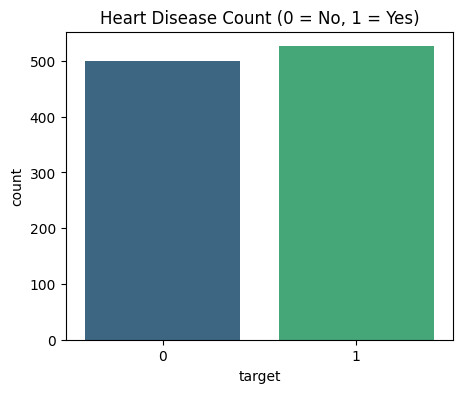

In [4]:
# Target Distribution
# ----------------------------------
plt.figure(figsize=(5,4))
sns.countplot(x=df["target"], palette="viridis")
plt.title("Heart Disease Count (0 = No, 1 = Yes)")
plt.show()

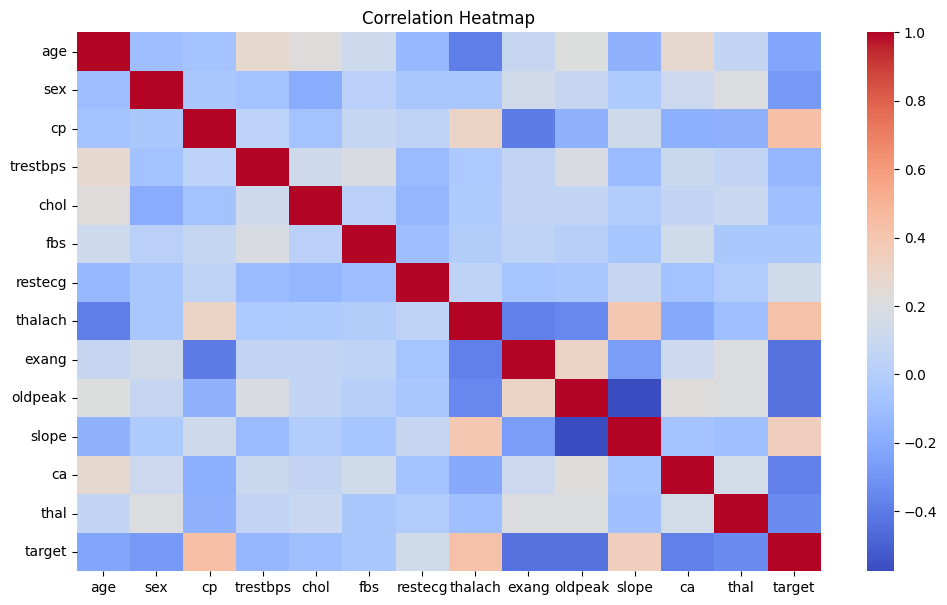

In [5]:
# Correlation Heatmap
# ----------------------------------
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


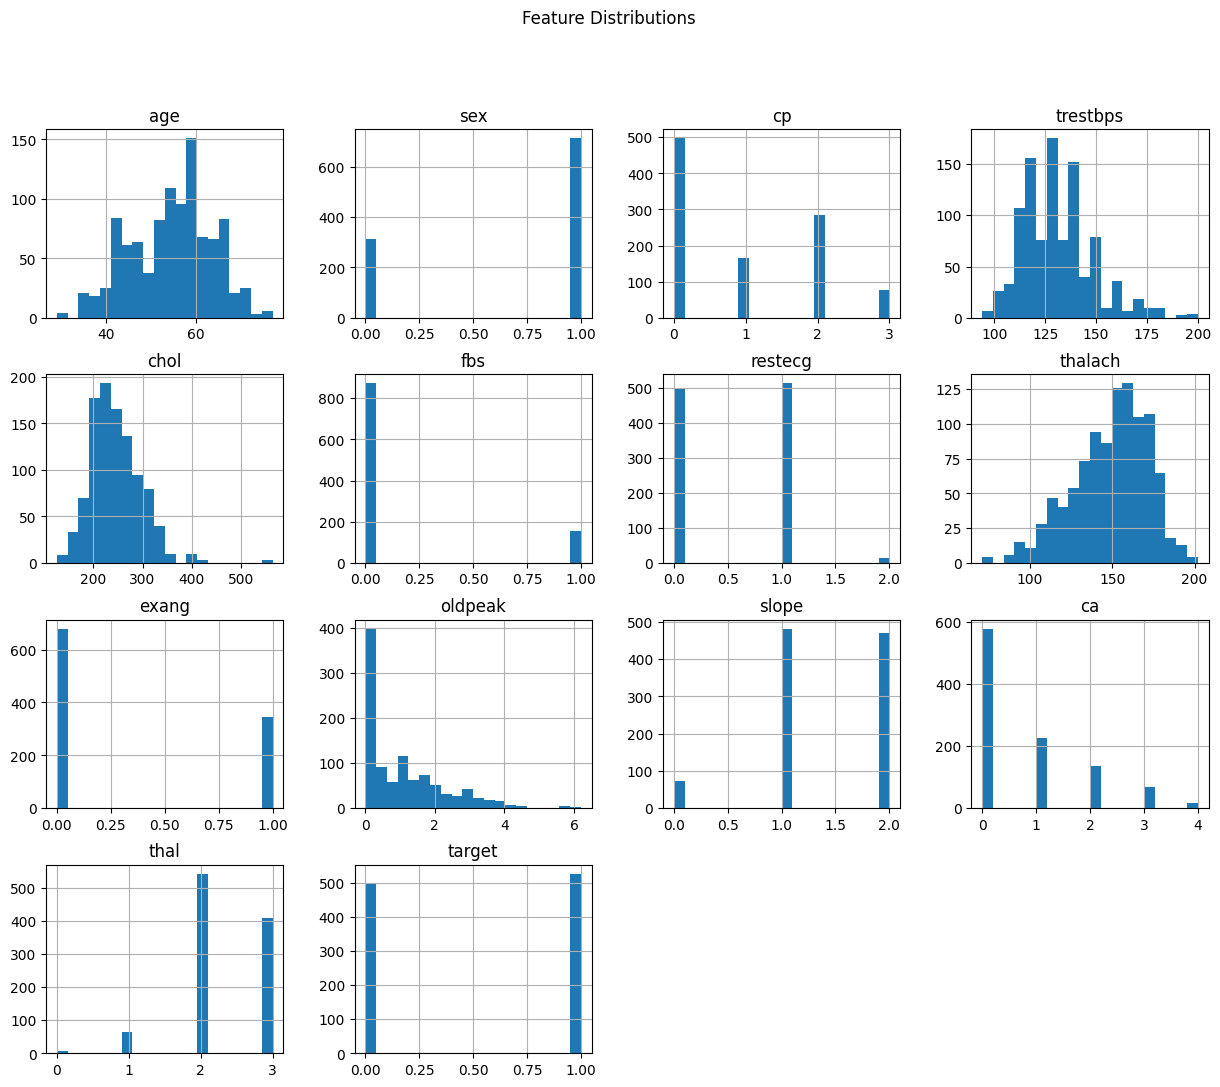

In [6]:
# Histogram of All Features
# ----------------------------------
df.hist(figsize=(15,12), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

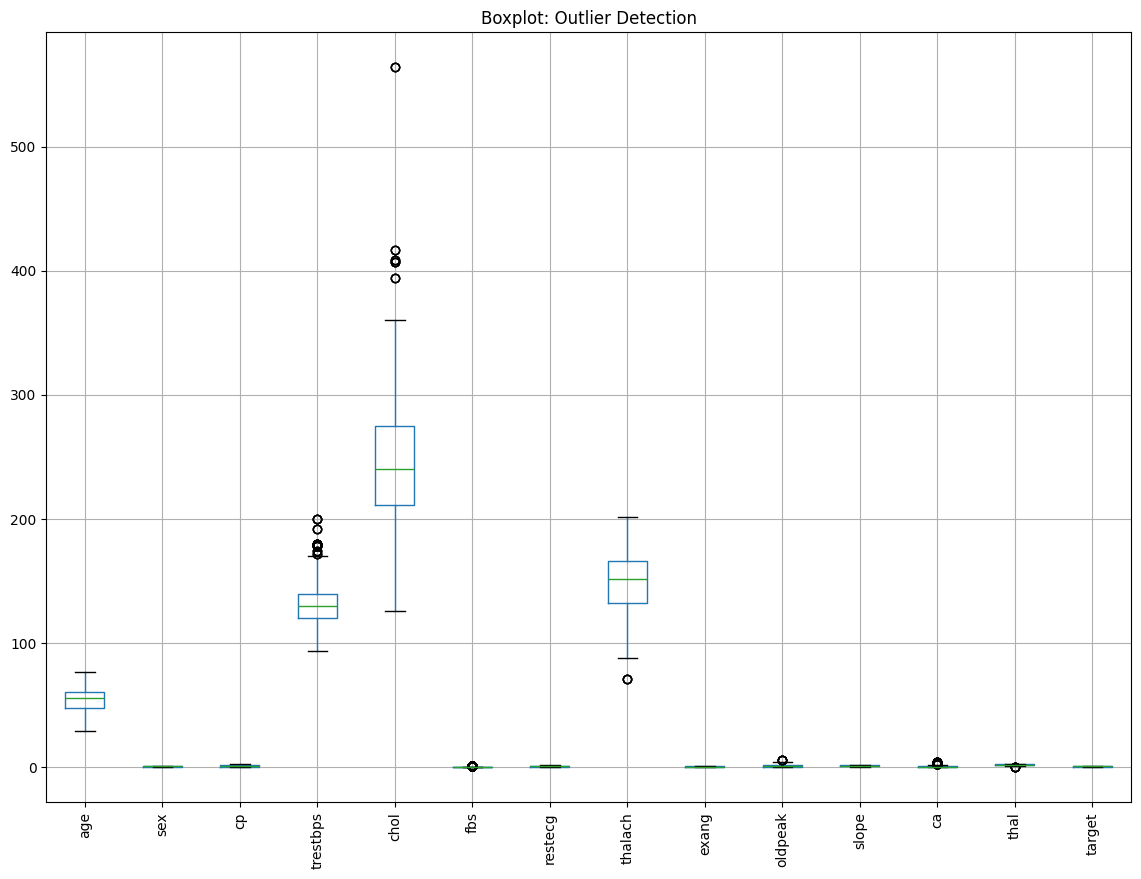

In [7]:
# Boxplots for Outliers
# ----------------------------------
plt.figure(figsize=(14,10))
df.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot: Outlier Detection")
plt.show()

In [9]:
# Train-Test Split
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling
# ----------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Train Logistic Regression
# ----------------------------------
model = LogisticRegression(max_iter=500)
model.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=500)

In [12]:
# Predictions
# ----------------------------------
y_pred = model.predict(X_test_scaled)

In [13]:
# Accuracy
# ----------------------------------
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.7951


In [14]:
# R² Score (Not ideal for classification)
# ----------------------------------
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.4f}")


R2 Score: 0.1805


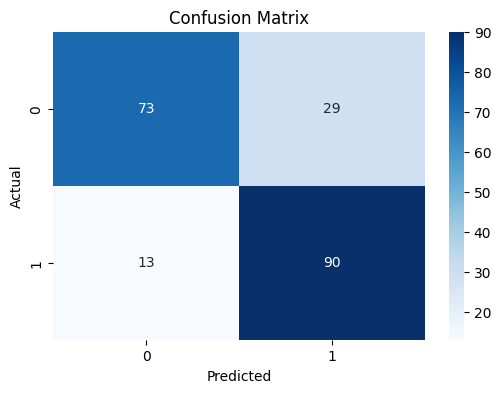

In [15]:
# Confusion Matrix Plot
# ----------------------------------
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

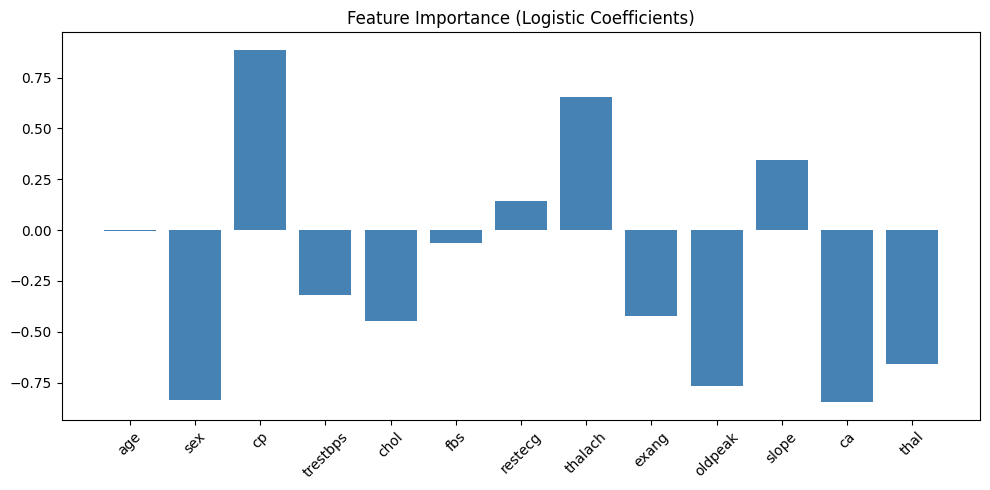

In [16]:
# Logistic Regression Coefficients
# ----------------------------------
coef = model.coef_[0]
features = X.columns

plt.figure(figsize=(10,5))
plt.bar(features, coef, color="steelblue")
plt.xticks(rotation=45)
plt.title("Feature Importance (Logistic Coefficients)")
plt.tight_layout()
plt.show()

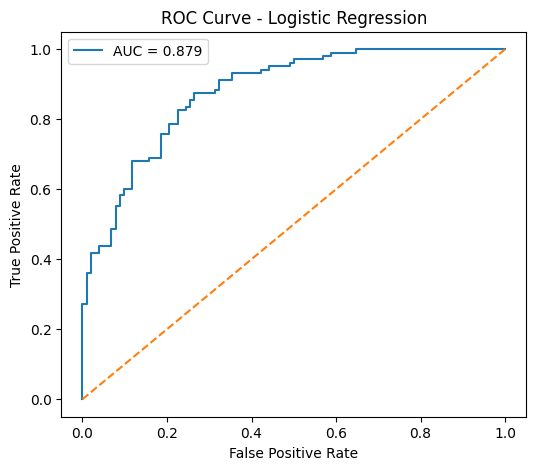

In [17]:
# ROC Curve
# ----------------------------------
y_prob = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.title("ROC Curve - Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

In [18]:
# Predict a New Person
# ----------------------------------
def predict_person(data_list):
    arr = np.array(data_list).reshape(1, -1)
    arr_scaled = scaler.transform(arr)
    pred = model.predict(arr_scaled)[0]

    return "Person HAS heart disease" if pred == 1 else "Person does NOT have heart disease"

In [20]:
# Example Prediction
example = [63,1,3,145,233,1,0,150,0,2.3,0,0,1]
print("\nPrediction of Heart Disease:", predict_person(example))


Prediction of Heart Disease: Person HAS heart disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
